In [133]:
import numpy as np
from matplotlib import pyplot as plt

In [134]:
text = 'The cat is a domestic species of small carnivorous mammal. It is the only domesticated species in the family Felidae and is often referred to as the domestic cat to distinguish it from the wild members of the family. A cat can either be a house cat, a farm cat or a feral cat; the latter ranges freely and avoids human contact. Domestic cats are valued by humans for companionship and their ability to hunt pests such as rodents. About 60 cat breeds are recognized by various cat registries. The cat is similar in anatomy to the other felid species: it has a strong flexible body, quick reflexes, sharp teeth and retractable claws adapted to killing small prey. Its night vision and sense of smell are well developed. Cat communication includes vocalizations like meowing, purring, trilling, hissing, growling and grunting as well as cat-specific body language. It is a solitary hunter but a social species. It can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small mammals. It is a predator that is most active at dawn and dusk. It secretes and perceives pheromones. Female domestic cats can have kittens from spring to late autumn, with litter sizes ranging from two to five kittens.[9] Domestic cats are bred and shown at events as registered pedigreed cats, a hobby known as cat fancy. Failure to control breeding of pet cats by spaying and neutering, as well as abandonment of pets, resulted in large numbers of feral cats worldwide, contributing to the extinction of entire bird species and evoking population control. It was long thought that cat domestication was initiated in Ancient Egypt, because cats in ancient Egypt were venerated since around 3100 BC.[11][12] However, the earliest indication for the taming of an African wildcat (F. lybica) was found in Cyprus, where a cat skeleton was excavated close by a human Neolithic grave dating to around 7500 BC.[13] African wildcats were probably first domesticated in the Near East.'

In [137]:
import numpy as np

class word2vec_model():
    #settings
    def __init__(self, window_size, embedding_size, epochs, learning_rate):
        self.window = window_size
        self.embedding_size = embedding_size
        self.epochs = epochs
        self.lr = learning_rate

    #text to one-hot representation
    def prepare_data(self, data):
        counts = dict()
        tokens = [word.lower() for word in data.split()]
        for word in tokens:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
        self.vocab_size = len(counts.keys())
        self.word_index = dict((word, i) for i, word in enumerate(list(counts.keys())))
        self.index_word = dict((i, word) for i, word in enumerate(list(counts.keys())))        
        training_data = []   
        for i, word in enumerate(tokens):
            w_target = self.get_onehot(tokens[i])
            w_context = []
            for j in range(i - self.window, i + self.window+1):
                if j != i and j <= len(tokens)-1 and j >= 0:
                    w_context.append(self.get_onehot(tokens[j]))
            training_data.append([w_target, w_context])
        return np.array(training_data)
    
    #single word to one-hot vector of vocab_size
    def get_onehot(self, word):
        word_vec = [0 for i in range(0, self.vocab_size)]
        word_index = self.word_index[word]
        word_vec[word_index] = 1
        return word_vec
    
    #initialize weights and train for n epochs
    def train(self, data):
        training_data = self.prepare_data(data)
        history = []
        self.w1 = np.random.rand(self.vocab_size,self.embedding_size)
        self.w2 = np.random.rand(self.embedding_size,self.vocab_size) 
        for i in range(self.epochs):
            self.loss = 0
            for w_t, w_c in training_data:
                y_pred, h, u = self.forward_pass(w_t)            
                error = np.sum([np.subtract(y_pred, word) for word in w_c], axis=0)
                self.backward_pass(error, h, w_t)
                self.loss += -np.sum([u[word.index(1)] for word in w_c]) + len(w_c) * np.log(np.sum(np.exp(u)))
            history.append(self.loss)
            print('epoch: %d, loss: %.5f' % (i,self.loss))
        return history
    
    #calculate hidden layer values, weights and outupts
    def forward_pass(self, x):
        h = np.dot(self.w1.T, x)
        u = np.dot(self.w2.T, h)
        y_c = self.softmax(u)
        return y_c, h, u
    
    #backpropagation for weight updating
    def backward_pass(self, e, h, x):
        dl_dw2 = np.outer(h, e)
        dl_dw1 = np.outer(x, np.dot(self.w2, e.T))
        self.w1 = self.w1 - (self.lr * dl_dw1)
        self.w2 = self.w2 - (self.lr * dl_dw2)
    
    #softmax for regression
    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)
    
    #get single embedding for a word
    def get_vec(self, word):
        w_index = self.word_index[word]
        v_w = self.w1[w_index]
        return v_w
    
    #get embedding dictionary
    def get_vec_dict(self):
        return dict((self.index_word[i], emb) for i, emb in enumerate(self.w1))

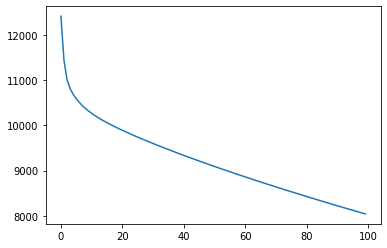

In [136]:
model = word2vec_model(window_size=3, embedding_size=100, epochs=100, learning_rate=0.001)
hist = model.train(text)
plt.plot(hist)

In [102]:
model.get_vec('cat')

array([-3.03278186e-01, -1.53268045e-01, -4.18445759e-01, -2.64178407e-01,
        8.52412531e-01, -9.56634241e-01, -6.41424228e-01,  9.48515738e-01,
       -4.92429950e-01, -2.37167630e-01, -3.05743405e-01, -9.57934529e-01,
       -1.58394070e-01,  6.36063395e-01,  3.88232366e-01, -9.51731945e-01,
       -7.45962532e-01, -6.49552744e-02, -2.75645680e-01, -7.16786223e-01,
        8.45151701e-01,  9.40337645e-01,  2.82444033e-01, -9.11031001e-01,
       -6.26797193e-01,  1.36500244e-02, -2.81215604e-01,  8.28128946e-01,
        5.08743003e-01,  5.34345450e-01, -8.92219381e-01,  6.85530315e-01,
       -4.78697295e-01,  8.60732096e-01, -5.28136879e-01,  7.34744413e-01,
        7.70614083e-01,  6.73849675e-01, -2.11633644e-01, -9.44011238e-01,
        3.81112126e-04,  4.99307718e-01,  6.48692877e-01, -2.31410095e-01,
       -1.36401523e-01, -6.36545752e-02,  1.01050210e-01, -3.47877176e-01,
       -1.93610494e-01, -2.03531381e-01])

In [115]:
#model.get_vec_dict()

{'The': array([ 0.94879485, -0.35813639,  0.07161102, -0.88768744, -0.36452383,
         0.59969771, -0.71435472, -0.19225032, -0.90106239, -0.34624802,
         0.72996538, -0.1125802 ,  0.76003769, -0.71925103, -0.82044002,
        -0.88929749,  0.95492167, -0.02112756, -0.01729462, -0.76931777,
        -0.66084953, -0.03479308,  0.42677121, -0.42254955,  0.39633317,
        -0.5508426 ,  0.20428578, -0.59154334,  0.45969579, -0.9782399 ,
         0.52599777,  0.65839845,  0.95300054,  0.76884391,  0.33311417,
         0.3760436 , -0.66266365,  0.24511868, -0.45617508,  0.18583242,
        -0.17698783, -0.92734733, -0.02980502,  0.20321828,  0.55842129,
         0.99069785, -0.25233867, -0.52045802,  0.40404574, -0.43576898,
         0.87855297,  0.63763543, -0.1373299 , -0.24948139, -0.1611988 ,
         0.3305812 ,  0.15913219,  0.71511915, -0.52275345,  0.48851865,
        -0.92710107, -0.3237865 ,  0.23144903, -0.009676  , -0.41357391,
         0.21920765,  0.46071959, -0.8755926